REGRESIÓN LINEAL 

In [30]:
ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta)  
df.isnull().sum()


om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [31]:
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
# Imputar los valores NaN con la media de la columna 'mag'
df['mag'] = df['mag'].fillna(df['mag'].mean())

In [32]:
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

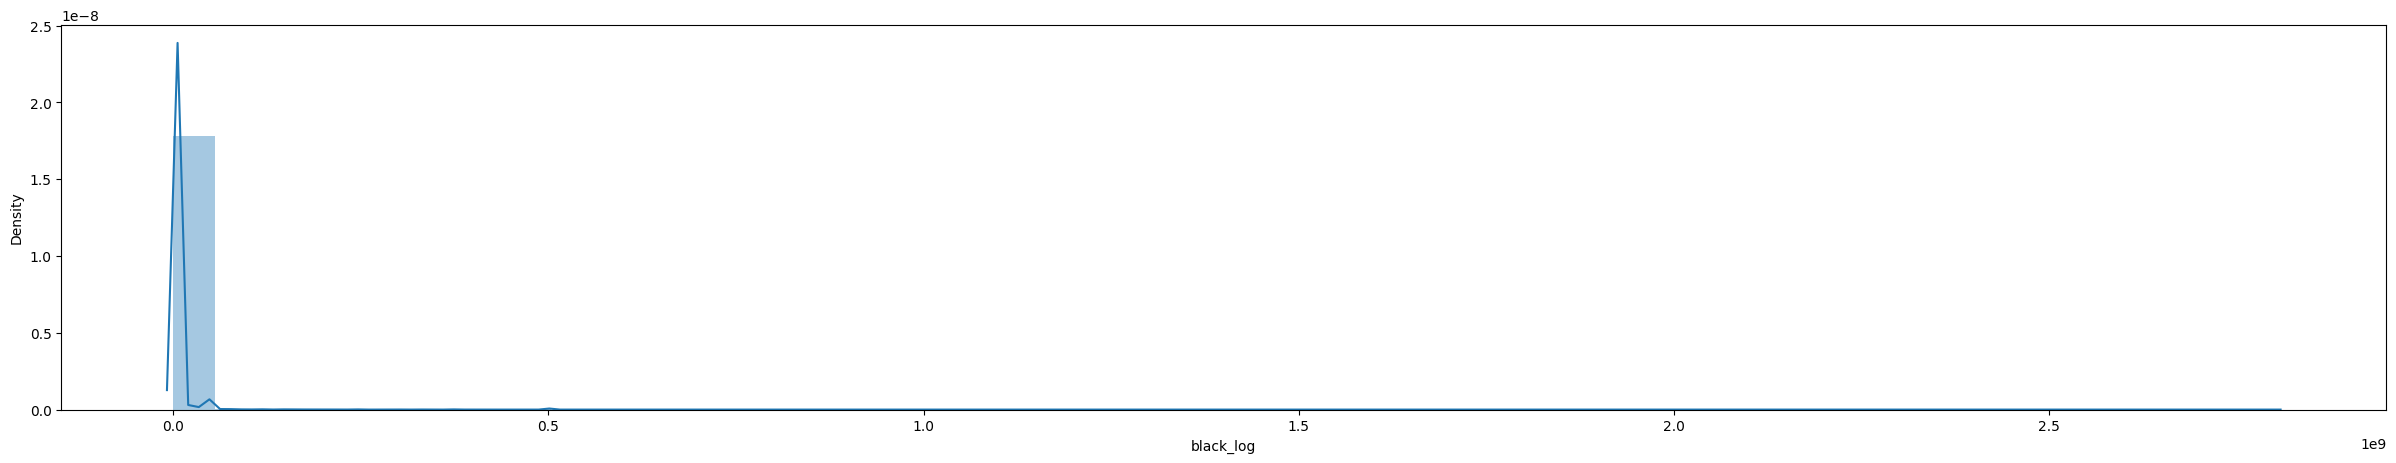

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(30,5))

# Crear el gráfico de distribución
sns.distplot(df["loss"], axlabel="black_log")

# Mostrar el gráfico
plt.show()


In [34]:
# Contar el número de datos no nulos por columna en X
print("Número de datos por columna en X:")
print(X.count())


Número de datos por columna en X:
mag     68693
slat    68693
slon    68693
elat    68693
elon    68693
len     68693
wid     68693
fat     68693
f1      68693
f2      68693
f3      68693
f4      68693
dtype: int64


In [35]:
# Contar el número de datos no nulos en y
print("\nNúmero de datos en y:")
print(y.count())



Número de datos en y:
68693


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir X y y (asegúrate de que ya tienes estas variables previamente definidas)
X = df[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid','fat','f1', 'f2', 'f3', 'f4','loss']]
y = df['inj']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lr = LinearRegression().fit(X_train, y_train)

# Mostrar los coeficientes y el intercepto del modelo
print("Coeficientes del modelo:", lr.coef_)
print("Intercepto del modelo:", lr.intercept_)

# Hacer predicciones con el modelo en el conjunto de prueba
y_pred = lr.predict(X_test)

# Evaluar el modelo con la puntuación R^2 (coeficiente de determinación)
r2_score = lr.score(X_test, y_test)
print(f"Puntuación R^2 en el conjunto de prueba: {r2_score}")


Coeficientes del modelo: [ 1.03933097e+00 -2.34167006e-02  5.48057092e-03  1.67695299e-02
  1.01654786e-02  1.32225799e-01  8.84202034e-04  7.64548959e+00
 -6.75772303e-04  9.71291867e-04  1.96154227e-03  9.77616370e-03
  1.14162944e-07]
Intercepto del modelo: 0.8017899647209744
Puntuación R^2 en el conjunto de prueba: 0.6574705265235996


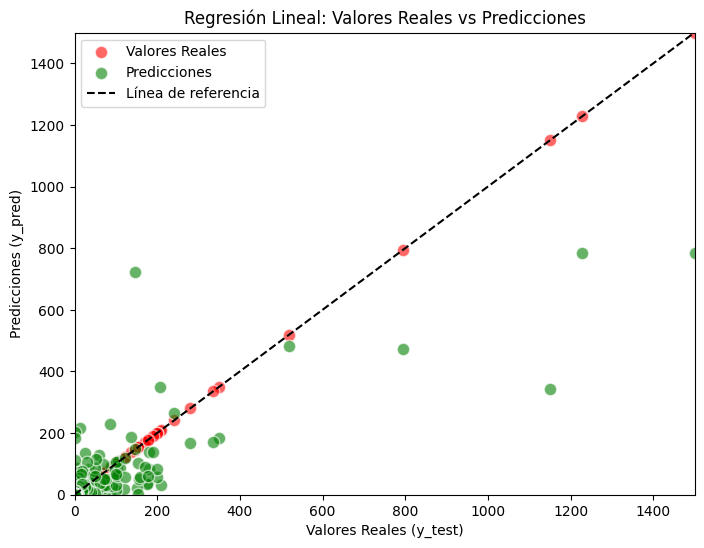

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar el gráfico de dispersión
plt.figure(figsize=(8, 6))

# Graficar los puntos de los valores reales (y_test) en rojo
plt.scatter(y_test, y_test, color='red', alpha=0.6, label="Valores Reales", edgecolors='w', s=80)

# Graficar los puntos de las predicciones (y_pred) en verde
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label="Predicciones", edgecolors='w', s=80)

# Agregar una línea de referencia y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Línea de referencia")

# Ajustar límites de los ejes para que coincidan mejor
plt.xlim([min(y_test) - 0.1, max(y_test) + 0.1])
plt.ylim([min(y_test) - 0.1, max(y_test) + 0.1])

# Etiquetas y título
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


Regresión ridge

In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge:")
print(coeficientes)

print("\nIntercepto del modelo ridge:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge:
mag     1.039309e+00
slat   -2.341668e-02
slon    5.480847e-03
elat    1.676932e-02
elon    1.016552e-02
len     1.322287e-01
wid     8.842742e-04
fat     7.645406e+00
f1     -6.757693e-04
f2      9.712519e-04
f3      1.961607e-03
f4      9.775862e-03
loss    1.141649e-07
dtype: float64

Intercepto del modelo ridge:
0.8018254182697473


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge10.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge10.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge10:")
print(coeficientes)

print("\nIntercepto del modelo ridge10:")
print(intercepto)

Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge10:
mag     1.039110e+00
slat   -2.341653e-02
slon    5.483329e-03
elat    1.676740e-02
elon    1.016593e-02
len     1.322550e-01
wid     8.849233e-04
fat     7.644650e+00
f1     -6.757427e-04
f2      9.708920e-04
f3      1.962185e-03
f4      9.773146e-03
loss    1.141829e-07
dtype: float64

Intercepto del modelo ridge10:
0.8021444212701071


In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

# Ver los coeficientes de cada variable en el modelo
coeficientes = pd.Series(ridge01.coef_, index=X_train.columns)

# Ver el intercepto del modelo
intercepto = ridge01.intercept_

# Mostrar los coeficientes y el intercepto
print("Coeficientes del modelo ridge01:")
print(coeficientes)

print("\nIntercepto del modelo ridge01:")
print(intercepto)




Training set score: 0.59
Test set score: 0.66
Coeficientes del modelo ridge01:
mag     1.039329e+00
slat   -2.341670e-02
slon    5.480599e-03
elat    1.676951e-02
elon    1.016548e-02
len     1.322261e-01
wid     8.842092e-04
fat     7.645481e+00
f1     -6.757720e-04
f2      9.712879e-04
f3      1.961549e-03
f4      9.776134e-03
loss    1.141631e-07
dtype: float64

Intercepto del modelo ridge01:
0.8017935101684196


In [42]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


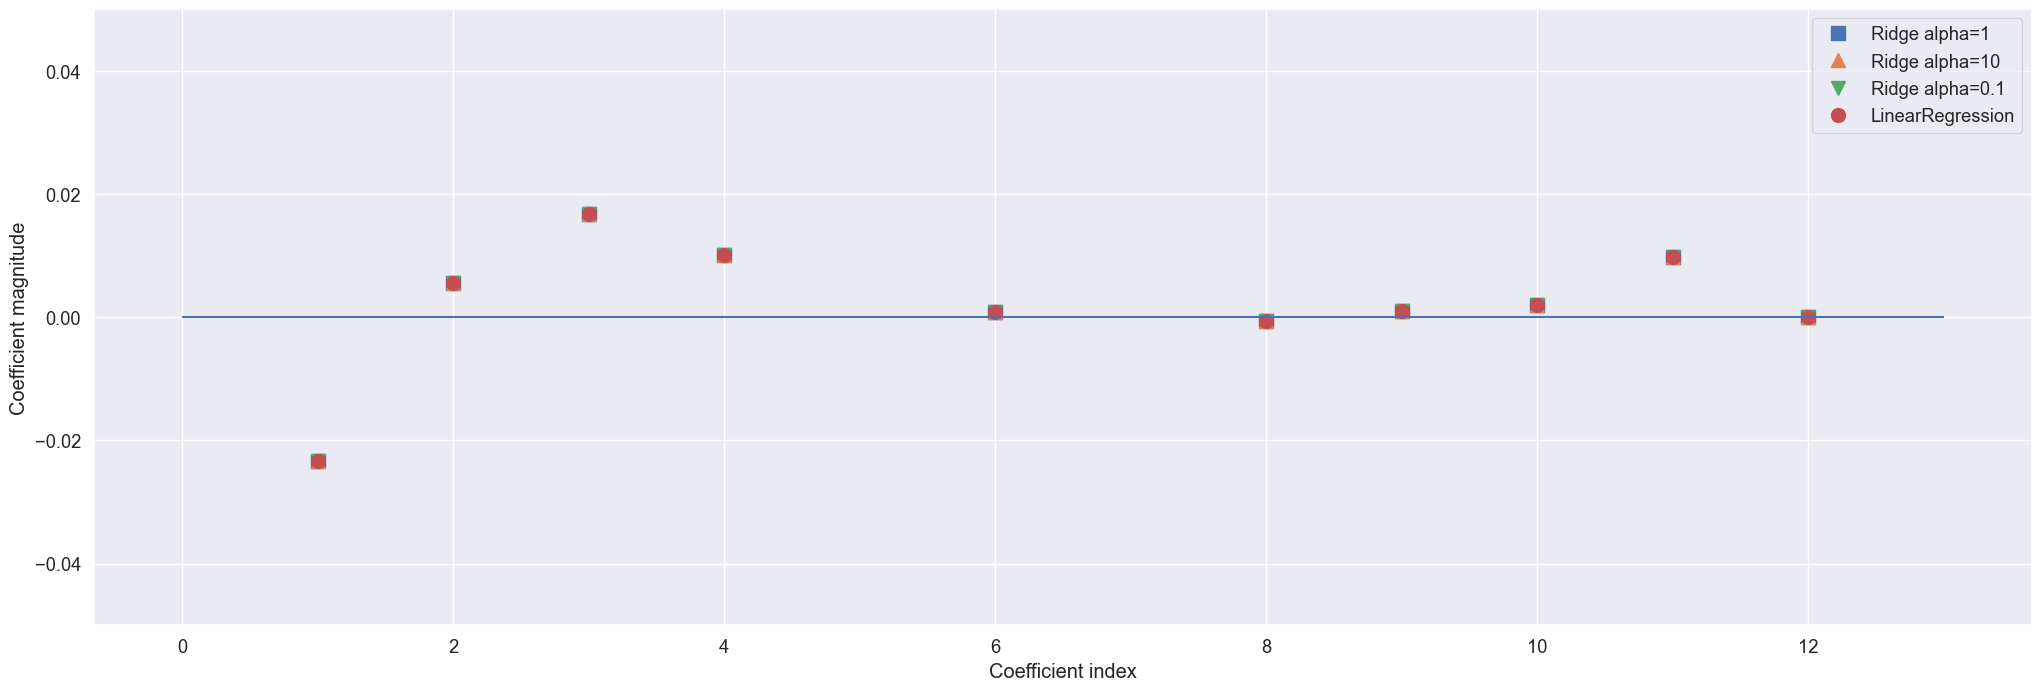

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(font_scale=1.2)


# Establecer el tamaño de la fuente
sns.set(font_scale=1.2)

# Crear la figura
plt.figure(figsize=(25, 8))

# Graficar los coeficientes para diferentes modelos
plt.plot(ridge.coef_, 's', label="Ridge alpha=1", markersize=10)  # Tamaño de marcador aumentado
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10", markersize=10)
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1", markersize=10)
plt.plot(lr.coef_, 'o', label="LinearRegression", markersize=10)

# Ajustar las etiquetas y las líneas de referencia
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# Línea horizontal en y = 0 para visualización
plt.hlines(0, 0, len(lr.coef_))

# Ajustar el límite del eje Y
plt.ylim(-0e3, 0e3)  # Ajusta según el rango de los coeficientes (puedes modificar esto)

# Cambiar el eje Y a una escala logarítmica si la disparidad es muy grande
# plt.yscale('symlog')  # Descomenta esta línea si quieres usar una escala logarítmica

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
